### <i>Importing the libraries</i>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve

In [2]:
## Read the file
d_train=pd.read_csv('train_insurance.csv')
d_test=pd.read_csv('test_insurance.csv')

In [3]:
d_train.shape,d_test.shape

((50882, 14), (21805, 13))

In [4]:
## Combine the data for analysis
df_final=pd.concat([d_train,d_test])

In [5]:
df_final

ID City_Code  Region_Code Accomodation_Type Reco_Insurance_Type  \
0          1        C3         3213            Rented          Individual   
1          2        C5         1117             Owned               Joint   
2          3        C5         3732             Owned          Individual   
3          4       C24         4378             Owned               Joint   
4          5        C8         2190            Rented          Individual   
...      ...       ...          ...               ...                 ...   
21800  72683        C3         1044             Owned          Individual   
21801  72684        C4          266             Owned          Individual   
21802  72685       C12         2470             Owned          Individual   
21803  72686       C10         1676            Rented          Individual   
21804  72687        C2         3617             Owned          Individual   

       Upper_Age  Lower_Age Is_Spouse Health Indicator  \
0             36         36        No               X1   
1             75         22        No               X2   
2             32         32        No              NaN   
3             52         48        No               X1   
4             44         44        No               X2   
...          ...        ...       ...              ...   
21800         45         45        No               X1   
21801         59         59        No               X5   
21802         74         74        No               X3   
21803         25         25        No               X4   
21804         73         73        No               X2   

      Holding_Policy_Duration  Holding_Policy_Type  Reco_Policy_Cat  \
0                         14+                  3.0               22   
1                         NaN                  NaN               22   
2                         1.0                  1.0               19   
3                         14+                  3.0               19   
4                         3.0                  1.0               16   
...                       ...                  ...              ...   
21800                     4.0                  1.0               18   
21801                     6.0                  3.0               18   
21802                     NaN                  NaN                1   
21803                     3.0                  1.0               19   
21804                     14+                  2.0                3   

       Reco_Policy_Premium  Response  
0                  11628.0       0.0  
1                  30510.0       0.0  
2                   7450.0       1.0  
3                  17780.0       0.0  
4                  10404.0       0.0  
...                    ...       ...  
21800              15884.0       NaN  
21801              21390.0       NaN  
21802              17836.0       NaN  
21803              11568.0       NaN  
21804              23040.0       NaN  

[72687 rows x 14 columns]

In [6]:
## observation: ID,city_code,Region_code has more distinct values for the customers

In [7]:
df_final.dtypes

ID                           int64
City_Code                   object
Region_Code                  int64
Accomodation_Type           object
Reco_Insurance_Type         object
Upper_Age                    int64
Lower_Age                    int64
Is_Spouse                   object
Health Indicator            object
Holding_Policy_Duration     object
Holding_Policy_Type        float64
Reco_Policy_Cat              int64
Reco_Policy_Premium        float64
Response                   float64
dtype: object

In [8]:
df_final.describe(include='all')

ID City_Code   Region_Code Accomodation_Type  \
count   72687.000000     72687  72687.000000             72687   
unique           NaN        36           NaN                 2   
top              NaN        C1           NaN             Owned   
freq             NaN     12762           NaN             40041   
mean    36344.000000       NaN   1737.573101               NaN   
std     20983.073845       NaN   1428.388402               NaN   
min         1.000000       NaN      1.000000               NaN   
25%     18172.500000       NaN    527.000000               NaN   
50%     36344.000000       NaN   1391.000000               NaN   
75%     54515.500000       NaN   2681.000000               NaN   
max     72687.000000       NaN   6194.000000               NaN   

       Reco_Insurance_Type     Upper_Age     Lower_Age Is_Spouse  \
count                72687  72687.000000  72687.000000     72687   
unique                   2           NaN           NaN         2   
top             Individual           NaN           NaN        No   
freq                 57877           NaN           NaN     60687   
mean                   NaN     44.862713     42.741632       NaN   
std                    NaN     17.293563     17.304194       NaN   
min                    NaN     18.000000     16.000000       NaN   
25%                    NaN     28.000000     27.000000       NaN   
50%                    NaN     44.000000     40.000000       NaN   
75%                    NaN     59.000000     57.000000       NaN   
max                    NaN     75.000000     75.000000       NaN   

       Health Indicator Holding_Policy_Duration  Holding_Policy_Type  \
count             55969                   43833         43833.000000   
unique                9                      15                  NaN   
top                  X1                     1.0                  NaN   
freq              18624                    6390                  NaN   
mean                NaN                     NaN             2.439486   
std                 NaN                     NaN             1.029450   
min                 NaN                     NaN             1.000000   
25%                 NaN                     NaN             1.000000   
50%                 NaN                     NaN             3.000000   
75%                 NaN                     NaN             3.000000   
max                 NaN                     NaN             4.000000   

        Reco_Policy_Cat  Reco_Policy_Premium      Response  
count      72687.000000         72687.000000  50882.000000  
unique              NaN                  NaN           NaN  
top                 NaN                  NaN           NaN  
freq                NaN                  NaN           NaN  
mean          15.122140         14194.856472      0.239947  
std            6.329295          6562.564815      0.427055  
min            1.000000          2152.000000      0.000000  
25%           12.000000          9254.000000      0.000000  
50%           17.000000         13200.000000      0.000000  
75%           20.000000         18144.000000      0.000000  
max           22.000000         43776.000000      1.000000

In [9]:
## Percentage of Missing values
missing_percent=(df_final.isnull().sum()/len(df_final))*100

In [10]:
missing_percent

ID                          0.000000
City_Code                   0.000000
Region_Code                 0.000000
Accomodation_Type           0.000000
Reco_Insurance_Type         0.000000
Upper_Age                   0.000000
Lower_Age                   0.000000
Is_Spouse                   0.000000
Health Indicator           22.999986
Holding_Policy_Duration    39.696232
Holding_Policy_Type        39.696232
Reco_Policy_Cat             0.000000
Reco_Policy_Premium         0.000000
Response                   29.998487
dtype: float64

In [11]:
## observation: Three features has missing values around 40% of max 

In [12]:
## Lets perform some basic EDA
## Accommodation type

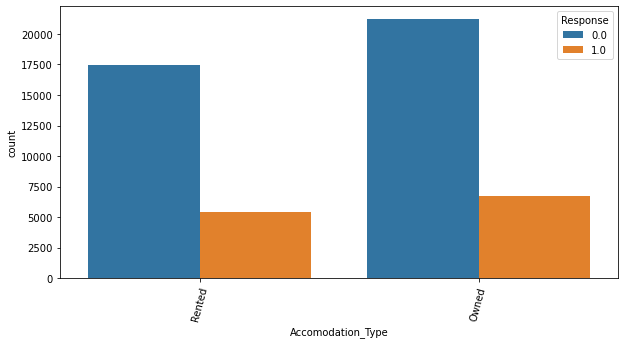

In [13]:
plt.figure(figsize=(10,5))
sns.countplot(df_final.Accomodation_Type,hue=df_final.Response)
plt.xticks(rotation=75)
plt.show()

In [14]:
## observation: We can see the proportion of Response features is not balanced and people with owned and rented house are quite balanced
## 

In [15]:
print('Response: \n',df_final.Response.value_counts(),"\n-------------------")
print("Accomodation: \n",df_final.Accomodation_Type.value_counts())

Response: 
 0.0    38673
1.0    12209
Name: Response, dtype: int64 
-------------------
Accomodation: 
 Owned     40041
Rented    32646
Name: Accomodation_Type, dtype: int64


In [16]:
## Interms of Owned we have 6763 people who are willing for insurance
## and 5446 people who are rendted willing for applying insurance

Individual    57877
Joint         14810
Name: Reco_Insurance_Type, dtype: int64

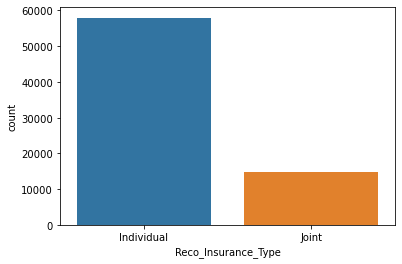

In [17]:
## Reco type
sns.countplot(df_final.Reco_Insurance_Type)
df_final.Reco_Insurance_Type.value_counts()

In [18]:
## The Individual insurance type has more propotion then Joint type.  

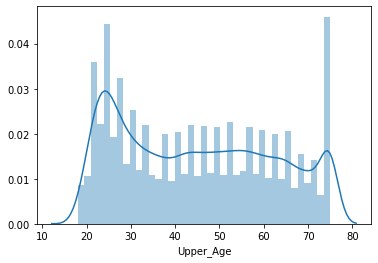

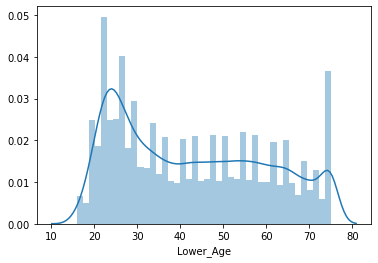

In [19]:
## Age
sns.distplot(df_final.Upper_Age)
plt.show()
sns.distplot(df_final.Lower_Age)
plt.show()

No     60687
Yes    12000
Name: Is_Spouse, dtype: int64

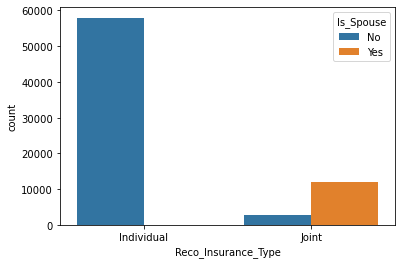

In [20]:
## Is_spouse
sns.countplot(df_final.Reco_Insurance_Type,hue=df_final.Is_Spouse)
df_final.Is_Spouse.value_counts()

In [21]:
dummy=df_final[df_final.Reco_Insurance_Type=='Individual']


In [22]:
dummy.Is_Spouse.value_counts()

No    57877
Name: Is_Spouse, dtype: int64

In [23]:
## As mentioned in the dictionary We dont have data for Individual type insurance customers

In [24]:
df_final.rename(columns={'Health Indicator':'Health_Indicator'},inplace=True)

In [25]:
df_final.columns

Index(['ID', 'City_Code', 'Region_Code', 'Accomodation_Type',
       'Reco_Insurance_Type', 'Upper_Age', 'Lower_Age', 'Is_Spouse',
       'Health_Indicator', 'Holding_Policy_Duration', 'Holding_Policy_Type',
       'Reco_Policy_Cat', 'Reco_Policy_Premium', 'Response'],
      dtype='object')

1.0     6390
14+     6227
2.0     6032
3.0     5192
4.0     3976
5.0     3354
6.0     2797
7.0     2309
8.0     1885
9.0     1607
10.0    1146
11.0     800
13.0     732
12.0     709
14.0     677
Name: Holding_Policy_Duration, dtype: int64

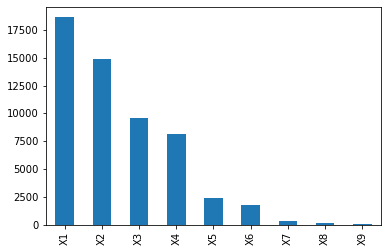

In [26]:
df_final.Health_Indicator.value_counts().plot(kind='bar')
df_final.Holding_Policy_Duration.value_counts()

In [27]:
##  last Three indicators have less frequency 

3.0    18851
1.0    11747
2.0     7155
4.0     6080
Name: Holding_Policy_Type, dtype: int64

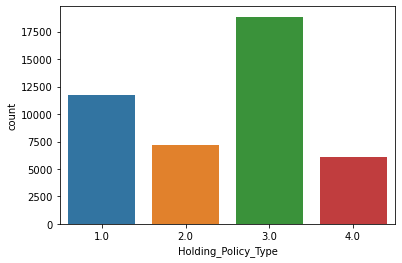

In [28]:
## Policy type

sns.countplot(df_final.Holding_Policy_Type)
df_final.Holding_Policy_Type.value_counts()

In [29]:
## Before proceeding with missing value imputation lets drop unwanted features and create a new feature and taking the 
## avg of upper and lower Age

In [30]:
df_final=df_final.drop(['ID','City_Code','Region_Code'],axis=1)

In [31]:
## The above features doesn't make any sense to dependent feature

In [32]:
## Lets convert 14+ to 15
df_final.loc[:,'Holding_Policy_Duration'].replace('14+','15',inplace=True)

In [33]:
df_final.Holding_Policy_Duration.value_counts()

1.0     6390
15      6227
2.0     6032
3.0     5192
4.0     3976
5.0     3354
6.0     2797
7.0     2309
8.0     1885
9.0     1607
10.0    1146
11.0     800
13.0     732
12.0     709
14.0     677
Name: Holding_Policy_Duration, dtype: int64

In [34]:
## lets perform missing value imputation
## All the three features has significant amount of missing value hence rather then using statistical measure we can proceed with 
## either alogorithm based imputation

In [35]:
df_final

Accomodation_Type Reco_Insurance_Type  Upper_Age  Lower_Age Is_Spouse  \
0                Rented          Individual         36         36        No   
1                 Owned               Joint         75         22        No   
2                 Owned          Individual         32         32        No   
3                 Owned               Joint         52         48        No   
4                Rented          Individual         44         44        No   
...                 ...                 ...        ...        ...       ...   
21800             Owned          Individual         45         45        No   
21801             Owned          Individual         59         59        No   
21802             Owned          Individual         74         74        No   
21803            Rented          Individual         25         25        No   
21804             Owned          Individual         73         73        No   

      Health_Indicator Holding_Policy_Duration  Holding_Policy_Type  \
0                   X1                      15                  3.0   
1                   X2                     NaN                  NaN   
2                  NaN                     1.0                  1.0   
3                   X1                      15                  3.0   
4                   X2                     3.0                  1.0   
...                ...                     ...                  ...   
21800               X1                     4.0                  1.0   
21801               X5                     6.0                  3.0   
21802               X3                     NaN                  NaN   
21803               X4                     3.0                  1.0   
21804               X2                      15                  2.0   

       Reco_Policy_Cat  Reco_Policy_Premium  Response  
0                   22              11628.0       0.0  
1                   22              30510.0       0.0  
2                   19               7450.0       1.0  
3                   19              17780.0       0.0  
4                   16              10404.0       0.0  
...                ...                  ...       ...  
21800               18              15884.0       NaN  
21801               18              21390.0       NaN  
21802                1              17836.0       NaN  
21803               19              11568.0       NaN  
21804                3              23040.0       NaN  

[72687 rows x 11 columns]

In [36]:
acc_map={'Rented':1,'Owned':2}
Insurancetype_map={'Individual':1,'Joint':2}
Spouse_map={'No':1,'Yes':2}

In [37]:
df_final.Accomodation_Type=df_final.Accomodation_Type.map(acc_map)


In [38]:
df_final.Reco_Insurance_Type=df_final.Reco_Insurance_Type.map(Insurancetype_map)

In [39]:
df_final.Is_Spouse=df_final.Is_Spouse.map(Spouse_map)

In [40]:
## lets take avg age considering both upper and lower age 

In [41]:
df_final['Avg_age']=(df_final['Upper_Age'] + df_final['Lower_Age'] )/2

### dropping both age columns since we have created a new feature by taking avg

In [42]:
df_final=df_final.drop(['Upper_Age','Lower_Age'],axis=1)

In [43]:
df_final

Accomodation_Type  Reco_Insurance_Type  Is_Spouse Health_Indicator  \
0                      1                    1          1               X1   
1                      2                    2          1               X2   
2                      2                    1          1              NaN   
3                      2                    2          1               X1   
4                      1                    1          1               X2   
...                  ...                  ...        ...              ...   
21800                  2                    1          1               X1   
21801                  2                    1          1               X5   
21802                  2                    1          1               X3   
21803                  1                    1          1               X4   
21804                  2                    1          1               X2   

      Holding_Policy_Duration  Holding_Policy_Type  Reco_Policy_Cat  \
0                          15                  3.0               22   
1                         NaN                  NaN               22   
2                         1.0                  1.0               19   
3                          15                  3.0               19   
4                         3.0                  1.0               16   
...                       ...                  ...              ...   
21800                     4.0                  1.0               18   
21801                     6.0                  3.0               18   
21802                     NaN                  NaN                1   
21803                     3.0                  1.0               19   
21804                      15                  2.0                3   

       Reco_Policy_Premium  Response  Avg_age  
0                  11628.0       0.0     36.0  
1                  30510.0       0.0     48.5  
2                   7450.0       1.0     32.0  
3                  17780.0       0.0     50.0  
4                  10404.0       0.0     44.0  
...                    ...       ...      ...  
21800              15884.0       NaN     45.0  
21801              21390.0       NaN     59.0  
21802              17836.0       NaN     74.0  
21803              11568.0       NaN     25.0  
21804              23040.0       NaN     73.0  

[72687 rows x 10 columns]

### Function for Encoding the features contaning missing values

In [44]:
encoder=LabelEncoder()
def encode_data(data):
    ## retains only notnull values
    nonulls=np.array(data.dropna())
    impute_org=encoder.fit_transform(nonulls)
    ## assign back encoded values to non-null values
    data.loc[data.notnull()]=np.squeeze(impute_org)
    return data

In [45]:
df_final['Health_Indicator']=encode_data(df_final['Health_Indicator'])

In [46]:
df_final.isnull().sum()

Accomodation_Type              0
Reco_Insurance_Type            0
Is_Spouse                      0
Health_Indicator           16718
Holding_Policy_Duration    28854
Holding_Policy_Type        28854
Reco_Policy_Cat                0
Reco_Policy_Premium            0
Response                   21805
Avg_age                        0
dtype: int64

### Custom function for missing value imputation

In [47]:

def impute_columns(data):
    ## filtering x train data by removing null values
    x1=df_final[data.notna()]
    x=x1.drop(['Health_Indicator','Holding_Policy_Duration','Holding_Policy_Type','Response'],axis=1)
    ## retains only notnull values for each column
    nonulls=data.loc[data.notna()]
    y=pd.to_numeric(nonulls).astype(int)
    print(y)
    ## filterinf xtest data
    xtest=df_final[data.isnull()]
    x_testfinal=xtest.drop(['Health_Indicator','Holding_Policy_Duration','Holding_Policy_Type','Response'],axis=1)
    randomforest = RandomForestClassifier(n_estimators=100)
    randomforest.fit(x,y)
    y_pred=randomforest.predict(x_testfinal)
    return y_pred

In [48]:

columns=['Health_Indicator','Holding_Policy_Duration','Holding_Policy_Type']
for col in columns:
    df_final[col].loc[df_final[col].isnull()]=np.squeeze(impute_columns(df_final[col]))

0        0
1        1
3        0
4        1
5        1
        ..
21800    0
21801    4
21802    2
21803    3
21804    1
Name: Health_Indicator, Length: 55969, dtype: int32
0        15
2         1
3        15
4         3
5         5
         ..
21799     6
21800     4
21801     6
21803     3
21804    15
Name: Holding_Policy_Duration, Length: 43833, dtype: int32
0        3
2        1
3        3
4        1
5        1
        ..
21799    3
21800    1
21801    3
21803    1
21804    2
Name: Holding_Policy_Type, Length: 43833, dtype: int32


In [49]:
df_final.Health_Indicator=pd.to_numeric(df_final.Health_Indicator).astype(int)
df_final.Holding_Policy_Duration=pd.to_numeric(df_final.Holding_Policy_Duration).astype(int)
df_final.Holding_Policy_Type=pd.to_numeric(df_final.Holding_Policy_Type).astype(int)

### Split the train and test file

In [50]:
df_train=df_final.iloc[:50882,:]
df_test=df_final.iloc[50882:72687,:]

In [51]:
df_train.shape,df_test.shape

((50882, 10), (21805, 10))

In [52]:
X=df_train.drop(['Response'],axis=1)
Y=df_train['Response']

### Oversampling to handle class imbalance

In [53]:
##from imblearn.over_sampling import SMOTE
##from imblearn.over_sampling import RandomOverSampler

In [54]:
##smote=SMOTE() 
##x_res,y_res=smote.fit_sample(X,Y)

In [55]:
##from collections import Counter
##print("before",Counter(Y))
##print("after",Counter(y_res))

### Lets standartize the data for few algorithms

In [56]:
Scale=StandardScaler()
x_new=Scale.fit_transform(X)

### let us split the train data

In [98]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=SEED)
x_train1,x_test1,y_train1,y_test1=train_test_split(x_new,Y,test_size=0.3,random_state=0)

NameError: name 'SEED' is not defined

In [102]:
SEED = 2021
import random
import os
random.seed(SEED)
np.random.seed(SEED)
os.environ['PYTHONHASHSEED']=str(SEED)

### logistic regression

In [58]:
logreg=LogisticRegression()
logreg.fit(x_train1,y_train1)
y_pred = logreg.predict(x_test1)
y_pred
fpr1,tpr1,threshold1= roc_curve(y_test1, logreg.predict_proba(x_test1)[:,1])
score1=roc_auc_score(y_test1,logreg.predict_proba(x_test1)[:,1] )

### Random forest

In [59]:
randomforest = RandomForestClassifier(n_estimators=250,criterion='entropy',min_samples_split=2
                                     )
randomforest.fit(x_train, y_train)
y_pred = randomforest.predict(x_test)
score2=roc_auc_score(y_test,randomforest.predict_proba(x_test)[:,1] )
fpr2, tpr2, thresholds2 = roc_curve(y_test, randomforest.predict_proba(x_test)[:,1])

### XGboost

In [60]:
from xgboost import XGBClassifier
xboost = XGBClassifier(gamma=10,max_depth=10)
xboost.fit(x_train, y_train)
score6=roc_auc_score(y_test,xboost.predict_proba(x_test)[:,1] )
fpr6, tpr6, thresholds6 = roc_curve(y_test, xboost.predict_proba(x_test)[:,1])


[14:48:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [61]:
score6

0.6417291998828802

### KNN

In [62]:
 ##KNN or k-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train1, y_train1)
y_pred = knn.predict(x_test1)
score3=roc_auc_score(y_test1,knn.predict_proba(x_test1)[:,1] )
fpr3, tpr3, thresholds3 = roc_curve(y_test1, knn.predict_proba(x_test1)[:,1])

### NaiveB

In [63]:
# classical Naive Bayes
from sklearn.naive_bayes import CategoricalNB
classical = CategoricalNB()
classical.fit(x_train, y_train)
y_pred = classical.predict(x_test)
score5=roc_auc_score(y_test,classical.predict_proba(x_test)[:,1] )
fpr5, tpr5, thresholds5 = roc_curve(y_test, classical.predict_proba(x_test)[:,1])

In [81]:
from lightgbm import LGBMModel,LGBMClassifier
Lgb = LGBMClassifier(n_estimators=50,objective='binary',metrics ='auc')
Lgb.fit(x_train, y_train)
##y_pred = classical.predict(x_test)
score8=roc_auc_score(y_test,Lgb.predict_proba(x_test)[:,1] )
fpr8, tpr8, thresholds8 = roc_curve(y_test, Lgb.predict_proba(x_test)[:,1])


In [94]:
df_final

Accomodation_Type  Reco_Insurance_Type  Is_Spouse  Health_Indicator  \
0                      1                    1          1                 0   
1                      2                    2          1                 1   
2                      2                    1          1                 0   
3                      2                    2          1                 0   
4                      1                    1          1                 1   
...                  ...                  ...        ...               ...   
21800                  2                    1          1                 0   
21801                  2                    1          1                 4   
21802                  2                    1          1                 2   
21803                  1                    1          1                 3   
21804                  2                    1          1                 1   

       Holding_Policy_Duration  Holding_Policy_Type  Reco_Policy_Cat  \
0                           15                    3               22   
1                            4                    1               22   
2                            1                    1               19   
3                           15                    3               19   
4                            3                    1               16   
...                        ...                  ...              ...   
21800                        4                    1               18   
21801                        6                    3               18   
21802                       15                    3                1   
21803                        3                    1               19   
21804                       15                    2                3   

       Reco_Policy_Premium  Response  Avg_age  
0                  11628.0       0.0     36.0  
1                  30510.0       0.0     48.5  
2                   7450.0       1.0     32.0  
3                  17780.0       0.0     50.0  
4                  10404.0       0.0     44.0  
...                    ...       ...      ...  
21800              15884.0       NaN     45.0  
21801              21390.0       NaN     59.0  
21802              17836.0       NaN     74.0  
21803              11568.0       NaN     25.0  
21804              23040.0       NaN     73.0  

[72687 rows x 10 columns]

In [105]:
NUM_OF_BOOST_ROUND = 10000
EARLY_STOPPING = 300

In [112]:
cat_features_index=['0','1','2','3','4','5','6','7']
##cat_fea=int(cat_features_index)

In [113]:
type(cat_features_index)

list

In [116]:
params = {
    'cat_features': ['0','1','2','3','4','5','6','7'],
    'eval_metric': 'AUC',
    'random_seed': SEED,
    'n_estimators': NUM_OF_BOOST_ROUND,
}

In [117]:
bst = CatBoostClassifier(**params, early_stopping_rounds=EARLY_STOPPING)
bst.fit(x_train, y_train, eval_set=(x_test,y_test), plot=True, verbose=False)

ValueError: '0' is not in list

In [91]:
score9

0.6350733212126757

In [92]:
d_train.Accomodation_Type.size()

TypeError: 'int' object is not callable

In [64]:
final_score=pd.DataFrame({'Model': ['logreg','Randomforest','knn','NaiveB','xgboost'],
                         'auc_score':[score1,score2,score3,score5,score6]})
final_score.sort_values(by='auc_score',ascending=False)

Model  auc_score
4       xgboost   0.641729
1  Randomforest   0.593095
3        NaiveB   0.575710
0        logreg   0.561342
2           knn   0.540713

### Plotting the AUC-ROC graph

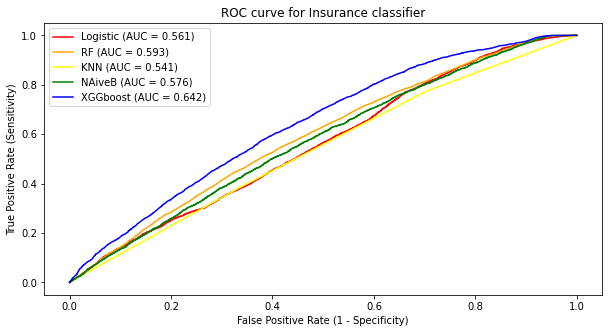

In [65]:
plt.figure(figsize=(10,5))
plt.title('ROC curve for Insurance classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.plot(fpr1, tpr1,color='red',label='Logistic (AUC = %0.3f)'% score1)
plt.plot(fpr2, tpr2,color='orange',label='RF (AUC = %0.3f)'% score2)
plt.plot(fpr3, tpr3,color='yellow',label='KNN (AUC = %0.3f)'% score3)
plt.plot(fpr5, tpr5,color='green',label='NAiveB (AUC = %0.3f)'% score5)
plt.plot(fpr6, tpr6,color='blue',label='XGGboost (AUC = %0.3f)'% score6)
plt.legend()
plt.show()

In [66]:
### Lets predict for the Test data
df_test=df_test.drop(['Response'],axis=1)

In [67]:
y_finalpred=xboost.predict_proba(df_test)[:,1]

In [68]:
id_add=d_test['ID']

In [69]:
submission=pd.DataFrame({'ID':id_add,'Response':y_finalpred})

In [70]:
submission.to_csv(r"C:\Users\venkatesh\hackathon\submission.csv",index="false")

In [71]:
## We have more no of customer which has own house comapring to those who are rented
## 